In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
# 값이 0 또는 1 이므로 로지스틱 회귀를 사용함

In [3]:
df = pd.read_csv("C:/Users/rltmdals/Downloads/user_action_10days.csv")

In [4]:
df_fillnan = df.fillna(999)
str_expr = "(day1 != 999) or \
    (day2 != 999) or \
    (day3 != 999) or \
    (day4 != 999) or \
    (day5 != 999) or \
    (day6 != 999) or \
    (day7 != 999) or \
    (day8 != 999) or \
    (day9 != 999) or \
    (day10 != 999)" 
df_q = df_fillnan.query(str_expr)
df_q

,user_id,day1,day2,day3,day4,day5,day6,day7,day8,day9,day10,subscribe
0,fa2ad653-e7d9-4250-8db0-c62c962ccd3f,SMSMFEESMSMSSMSMJEFEFJSMSMSSMSMSMSFJESJFEJSGEH...,SMSMSJFESSMSEFEEJJFEI,999,999,SEJFSMSMSMSJJJJEFSFEJSMSMSSMFESMS,ELLLLLLLLLLLLKKKKKSMSMSEJFSJEFSMSMSSSSSMSMSEJF...,SMSMJFEEJFSMSMSSMSSMSMSEJFSFEJSMSMSSSMSMSEJFSF...,999,999,999,0
1,695dbd71-59ee-427e-aa64-4ff7afd1e519,E,999,999,999,999,999,999,999,999,999,0
2,695016e2-4c93-4d57-868e-a2b218519b6c,SMSMSSMSMSSMSMSMSFJKKKEKKKKSJFESMSMS,999,999,999,999,999,999,999,999,999,0
3,e7d6135d-3b19-4655-893d-23adb79d227b,IJJJJIJJJJJJJJIJJJLLJJJJIGJJFMMMEFEE,999,EKKKKKKLJFMMMEELELFELLEJJJJJJEJJIJLLLFIJJJJIJJ...,ELELLFEIJJIJJJJJJJJJJJJJLIJJJJJJIFEJFMMM,EJFMMEJFMMMEFILIFIILIIEIFIIIEEIG,999,EJGJ,999,999,999,0
4,6b8a2ed4-5eb7-4530-91ec-512c03907a1a,EFL,SMSSMSSMSMSSMSMSSMEFS,EFSMSMSSMSMSSMEFSMSMSMSSMFISSMLLELLLFSMFESMS,SMEFSSSMSSMFESMSMSMSSSMEFSSMEFSSMFESMSMSMSMSMS...,SSMSMSMSMSSMSMSMSMSSMSMSMSSMSMSMSSSSMSSSMFESMEFSS,SMSSMEJJJFSSMEFS,999,999,999,999,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4160,2f89514e-179b-4617-a701-d9898fbdb8bb,SMSMFEESMKFEESMSMS,999,999,999,999,999,999,999,999,999,0
4161,7a96b199-bc6b-477d-98b7-53da66823d98,S,999,999,999,999,999,999,999,999,999,0
4162,809833f7-cdcb-4842-b200-e00d8ca4adc7,SMSEJFLSMSMSMSSMSMEFSMEFSMSMSSMFE,999,999,999,999,999,999,999,999,999,0
4163,dfa237f6-2b3c-4659-98a4-0dc300dee64d,EFEEIFIMIJEFSEFSEFSFESFESSMGEFHSSMSSMSMEFSMMMSMSS,999,999,999,999,999,999,999,999,999,0


In [7]:
df_day1 = df_q.copy()
df_1 = df_day1[['user_id', 'day1', 'day2']]
df_1 = df_1.replace(999, '0')
df_1['day2'] = df_1['day2'].apply(lambda x: 1 if x != '0' else 0)
df_1

,user_id,day1,day2
0,fa2ad653-e7d9-4250-8db0-c62c962ccd3f,SMSMFEESMSMSSMSMJEFEFJSMSMSSMSMSMSFJESJFEJSGEH...,1
1,695dbd71-59ee-427e-aa64-4ff7afd1e519,E,0
2,695016e2-4c93-4d57-868e-a2b218519b6c,SMSMSSMSMSSMSMSMSFJKKKEKKKKSJFESMSMS,0
3,e7d6135d-3b19-4655-893d-23adb79d227b,IJJJJIJJJJJJJJIJJJLLJJJJIGJJFMMMEFEE,0
4,6b8a2ed4-5eb7-4530-91ec-512c03907a1a,EFL,1
...,...,...,...
4160,2f89514e-179b-4617-a701-d9898fbdb8bb,SMSMFEESMKFEESMSMS,0
4161,7a96b199-bc6b-477d-98b7-53da66823d98,S,0
4162,809833f7-cdcb-4842-b200-e00d8ca4adc7,SMSEJFLSMSMSMSSMSMEFSMEFSMSMSSMFE,0
4163,dfa237f6-2b3c-4659-98a4-0dc300dee64d,EFEEIFIMIJEFSEFSEFSFESFESSMGEFHSSMSSMSMEFSMMMSMSS,0


In [8]:
alpha = ['E', 'F', 'G', 'I', 'J', 'L', 'M', 'S']

In [11]:
for i in alpha:
    df_1[i] = df_1['day1'].apply(lambda x: x.count(i))
df_1

,user_id,day1,day2,E,F,G,I,J,L,M,S
0,fa2ad653-e7d9-4250-8db0-c62c962ccd3f,SMSMFEESMSMSSMSMJEFEFJSMSMSSMSMSMSFJESJFEJSGEH...,1,9,8,1,0,9,0,14,22
1,695dbd71-59ee-427e-aa64-4ff7afd1e519,E,0,1,0,0,0,0,0,0,0
2,695016e2-4c93-4d57-868e-a2b218519b6c,SMSMSSMSMSSMSMSMSFJKKKEKKKKSJFESMSMS,0,2,2,0,0,2,0,9,14
3,e7d6135d-3b19-4655-893d-23adb79d227b,IJJJJIJJJJJJJJIJJJLLJJJJIGJJFMMMEFEE,0,3,2,1,4,21,2,3,0
4,6b8a2ed4-5eb7-4530-91ec-512c03907a1a,EFL,1,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4160,2f89514e-179b-4617-a701-d9898fbdb8bb,SMSMFEESMKFEESMSMS,0,4,2,0,0,0,0,5,6
4161,7a96b199-bc6b-477d-98b7-53da66823d98,S,0,0,0,0,0,0,0,0,1
4162,809833f7-cdcb-4842-b200-e00d8ca4adc7,SMSEJFLSMSMSMSSMSMEFSMEFSMSMSSMFE,0,4,4,0,0,1,1,10,13
4163,dfa237f6-2b3c-4659-98a4-0dc300dee64d,EFEEIFIMIJEFSEFSEFSFESFESSMGEFHSSMSSMSMEFSMMMSMSS,0,10,9,1,3,1,0,9,15


In [24]:
from collections import OrderedDict
s = 'aadabbbcfcc'
a = ''.join(OrderedDict.fromkeys(s))
print(a) # abc

from collections import OrderedDict
def str_set(x):
    if type(x) == str:
        s = x
        a = ''.join(OrderedDict.fromkeys(s))
        return a
    else:
        return x

adbcf


In [145]:
df_1to = df_1.copy()

In [146]:
df_1to['day1'] = df_1to['day1'].apply(lambda x: str_set(x))

In [147]:
df_1to = df_1to[['user_id', 'day1', 'day2']]
df_1to

,user_id,day1,day2
0,fa2ad653-e7d9-4250-8db0-c62c962ccd3f,SMFEJGHK,1
1,695dbd71-59ee-427e-aa64-4ff7afd1e519,E,0
2,695016e2-4c93-4d57-868e-a2b218519b6c,SMFJKE,0
3,e7d6135d-3b19-4655-893d-23adb79d227b,IJLGFME,0
4,6b8a2ed4-5eb7-4530-91ec-512c03907a1a,EFL,1
...,...,...,...
4160,2f89514e-179b-4617-a701-d9898fbdb8bb,SMFEK,0
4161,7a96b199-bc6b-477d-98b7-53da66823d98,S,0
4162,809833f7-cdcb-4842-b200-e00d8ca4adc7,SMEJFL,0
4163,dfa237f6-2b3c-4659-98a4-0dc300dee64d,EFIMJSGH,0


In [148]:
df_1to['len_day1'] = df_1to['day1'].apply(lambda x: len(x))

In [149]:
df_1to['str1'] = df_1to['day1'].apply(lambda x: x[0] if len(x) >= 1 else 0)
df_1to['str2'] = df_1to['day1'].apply(lambda x: x[1] if len(x) >= 2 else 0)
df_1to['str3'] = df_1to['day1'].apply(lambda x: x[2] if len(x) >= 3 else 0)
df_1to['str4'] = df_1to['day1'].apply(lambda x: x[3] if len(x) >= 4 else 0)
df_1to['str5'] = df_1to['day1'].apply(lambda x: x[4] if len(x) >= 5 else 0)
df_1to['str6'] = df_1to['day1'].apply(lambda x: x[5] if len(x) >= 6 else 0)
df_1to['str7'] = df_1to['day1'].apply(lambda x: x[6] if len(x) >= 7 else 0)
df_1to['str8'] = df_1to['day1'].apply(lambda x: x[7] if len(x) >= 8 else 0)
df_1to['str9'] = df_1to['day1'].apply(lambda x: x[8] if len(x) >= 9 else 0)
df_1to['str10'] = df_1to['day1'].apply(lambda x: x[9] if len(x) >= 10 else 0)

In [150]:
df_1to

,user_id,day1,day2,len_day1,str1,str2,str3,str4,str5,str6,str7,str8,str9,str10
0,fa2ad653-e7d9-4250-8db0-c62c962ccd3f,SMFEJGHK,1,8,S,M,F,E,J,G,H,K,0,0
1,695dbd71-59ee-427e-aa64-4ff7afd1e519,E,0,1,E,0,0,0,0,0,0,0,0,0
2,695016e2-4c93-4d57-868e-a2b218519b6c,SMFJKE,0,6,S,M,F,J,K,E,0,0,0,0
3,e7d6135d-3b19-4655-893d-23adb79d227b,IJLGFME,0,7,I,J,L,G,F,M,E,0,0,0
4,6b8a2ed4-5eb7-4530-91ec-512c03907a1a,EFL,1,3,E,F,L,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,2f89514e-179b-4617-a701-d9898fbdb8bb,SMFEK,0,5,S,M,F,E,K,0,0,0,0,0
4161,7a96b199-bc6b-477d-98b7-53da66823d98,S,0,1,S,0,0,0,0,0,0,0,0,0
4162,809833f7-cdcb-4842-b200-e00d8ca4adc7,SMEJFL,0,6,S,M,E,J,F,L,0,0,0,0
4163,dfa237f6-2b3c-4659-98a4-0dc300dee64d,EFIMJSGH,0,8,E,F,I,M,J,S,G,H,0,0


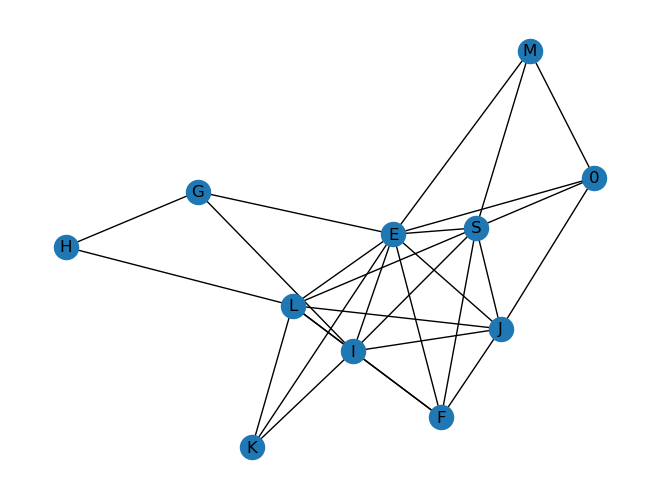

In [153]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
df = pd.DataFrame({ 'str1': df_1to['str1'], 'str2':df_1to['str2'], 'str3':df_1to['str3'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'str1', 'str2', 'str3')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()

In [154]:
def change_value(x):
    if x == 'S':
        return 1
    if x == 'M':
        return 2
    if x == 'G':
        return 3
    if x == 'E':
        return 4
    if x == 'F':
        return 5 
    if x == 'H':
        return 6
    if x == 'L':
        return 7
    if x == 'K':
        return 8
    if x == 'J':
        return 9
    if x == 'I':
        return 10
    if x == 0:
        return 0

In [155]:
col_list = ['str1', 'str2', 'str3', 'str4', 'str5', 'str6', 'str7', 'str8', 'str9', 'str10']

for i in col_list:
    df_1to[i] = df_1to[i].apply(lambda x: change_value(x))

In [156]:
df_1to

,user_id,day1,day2,len_day1,str1,str2,str3,str4,str5,str6,str7,str8,str9,str10
0,fa2ad653-e7d9-4250-8db0-c62c962ccd3f,SMFEJGHK,1,8,1,2,5,4,9,3,6,8,0,0
1,695dbd71-59ee-427e-aa64-4ff7afd1e519,E,0,1,4,0,0,0,0,0,0,0,0,0
2,695016e2-4c93-4d57-868e-a2b218519b6c,SMFJKE,0,6,1,2,5,9,8,4,0,0,0,0
3,e7d6135d-3b19-4655-893d-23adb79d227b,IJLGFME,0,7,10,9,7,3,5,2,4,0,0,0
4,6b8a2ed4-5eb7-4530-91ec-512c03907a1a,EFL,1,3,4,5,7,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,2f89514e-179b-4617-a701-d9898fbdb8bb,SMFEK,0,5,1,2,5,4,8,0,0,0,0,0
4161,7a96b199-bc6b-477d-98b7-53da66823d98,S,0,1,1,0,0,0,0,0,0,0,0,0
4162,809833f7-cdcb-4842-b200-e00d8ca4adc7,SMEJFL,0,6,1,2,4,9,5,7,0,0,0,0
4163,dfa237f6-2b3c-4659-98a4-0dc300dee64d,EFIMJSGH,0,8,4,5,10,2,9,1,3,6,0,0
